In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

#oversampling
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/framingham_heart_study.csv')

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


## Data Cleaning

In [ ]:
#imputing NaN values each column depands on data or distribution data
df['education'] = df['education'].fillna(1)
df['cigsPerDay'] = df['cigsPerDay'].fillna(np.round(df['cigsPerDay'].mean()))
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol'] = df['totChol'].fillna(np.round(df['totChol'].mean()))
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [ ]:
#changing data type of colum
df['education'] = df['education'].astype(int)
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df['diabetes'] = df['diabetes'].astype(int)
df['heartRate'] = df['heartRate'].astype(int)
df['glucose'] = df['glucose'].astype(int)

In [ ]:
#changing male column to gender
df.rename(columns = {'male' : 'gender'}, inplace= True)

## Exploratory Data Analysis (EDA)

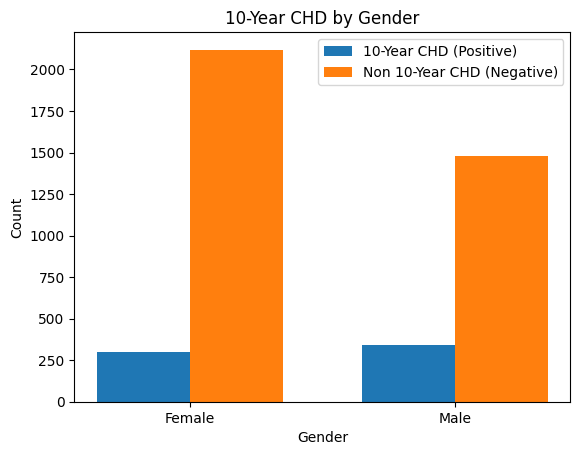

In [ ]:
chd_positive = df[df['TenYearCHD'] == 1].groupby('gender')['TenYearCHD'].count()
chd_negative = df[df['TenYearCHD'] == 0].groupby('gender')['TenYearCHD'].count()

# Indeks untuk posisi bar
index = np.arange(len(chd_positive))
bar_width = 0.35

#plot
plt.bar(index, chd_positive, width=bar_width, label='10-Year CHD (Positive)')
plt.bar(index + bar_width, chd_negative, width=bar_width, label='Non 10-Year CHD (Negative)')

plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('10-Year CHD by Gender')
plt.xticks(index + bar_width / 2, ['Female', 'Male'])
plt.legend()

plt.show()

Based on this plot, more men experience 10-Year CHD

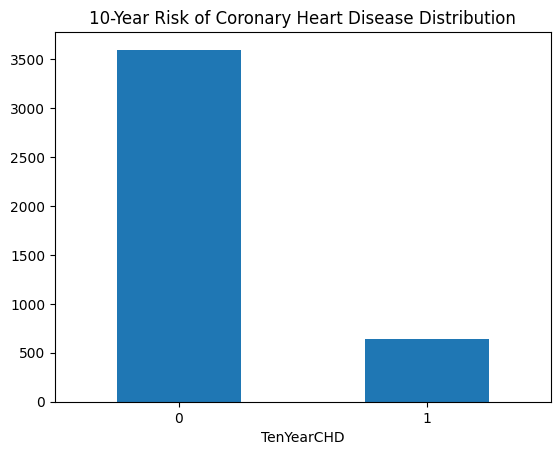

In [ ]:
df['TenYearCHD'].value_counts().plot(kind='bar')
plt.title('10-Year Risk of Coronary Heart Disease Distribution')
plt.xticks(rotation=0)
plt.show()

Based on this plot, an unbalanced distribution between 0 and 1 will make the model better understand patterns in 0 data

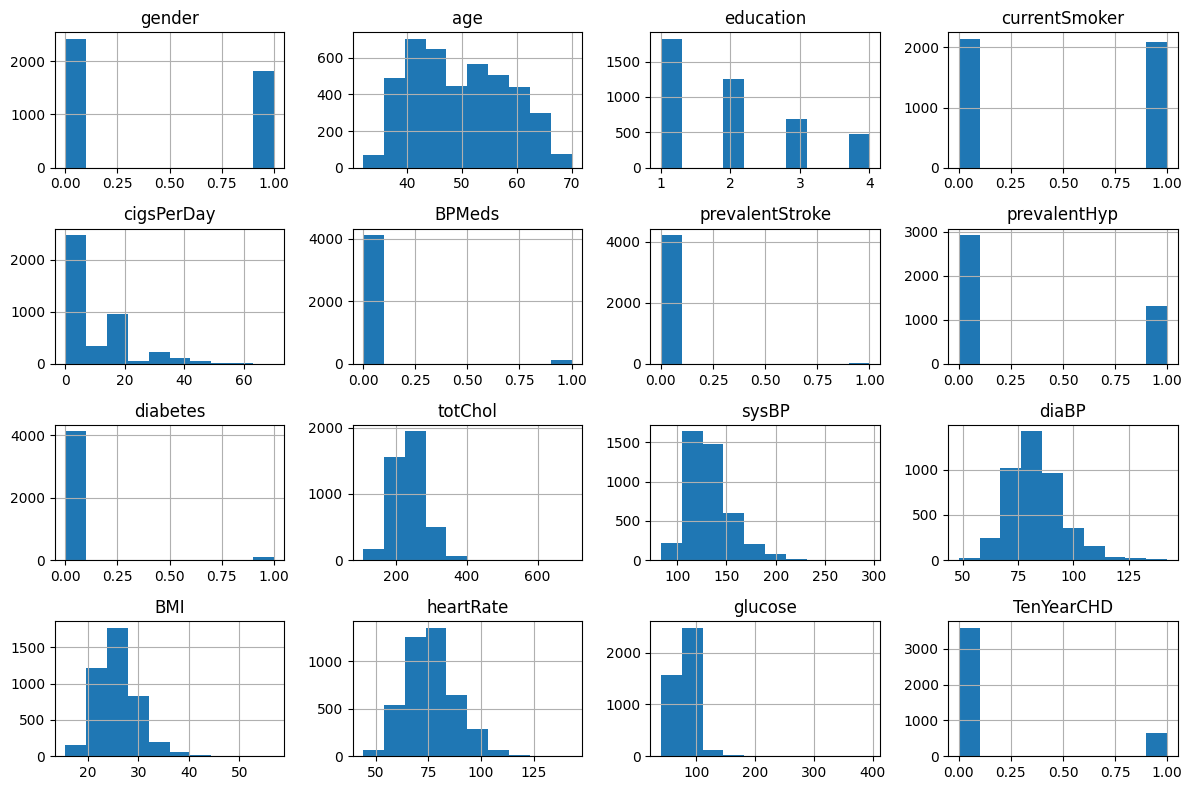

In [ ]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

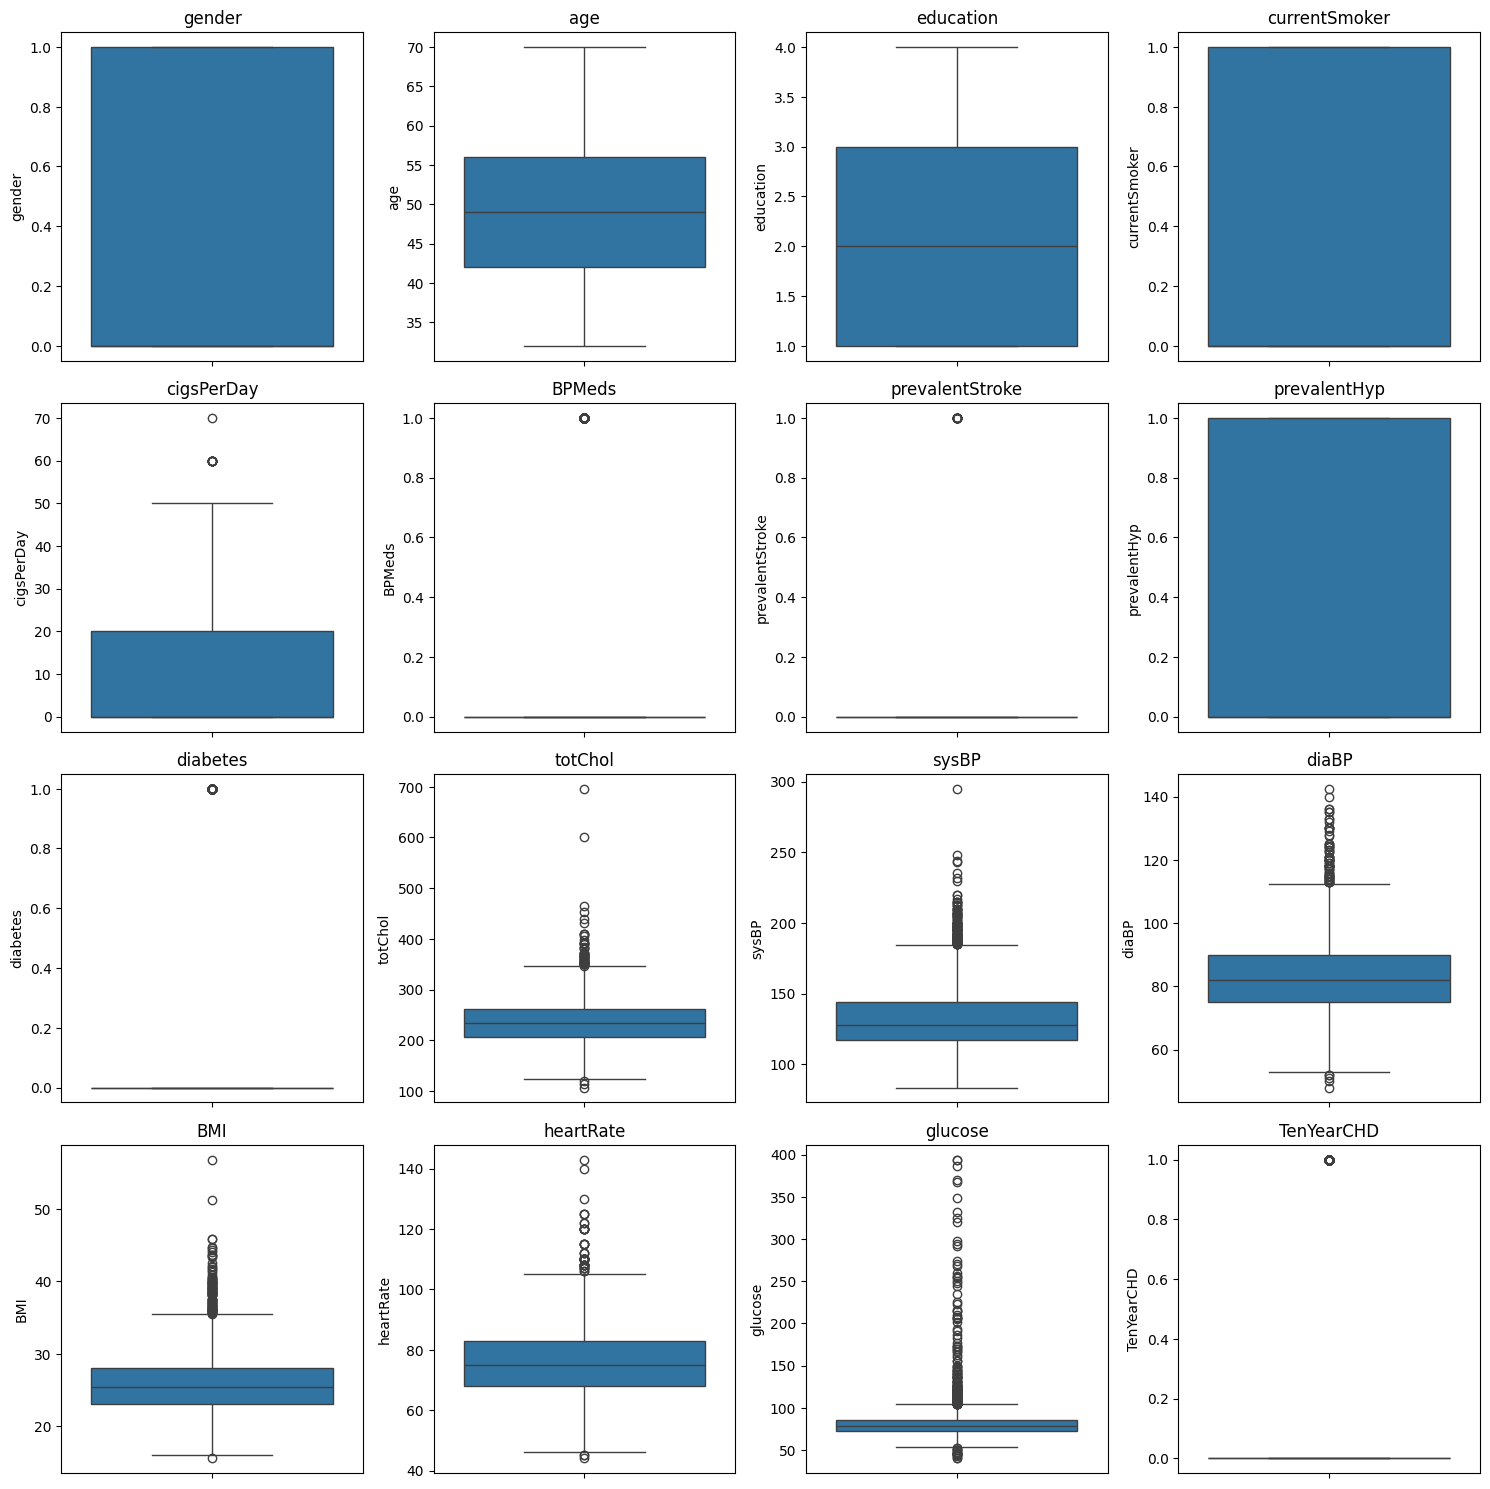

In [ ]:
#boxplot for 16 columns
fig,ax = plt.subplots(4,4,figsize=(15,15))
for i in range(16):
  sns.boxplot(df.iloc[:,i],ax=ax[i//4,i%4])
  ax[i//4,i%4].set_title(df.columns[i])
plt.tight_layout()
plt.show()

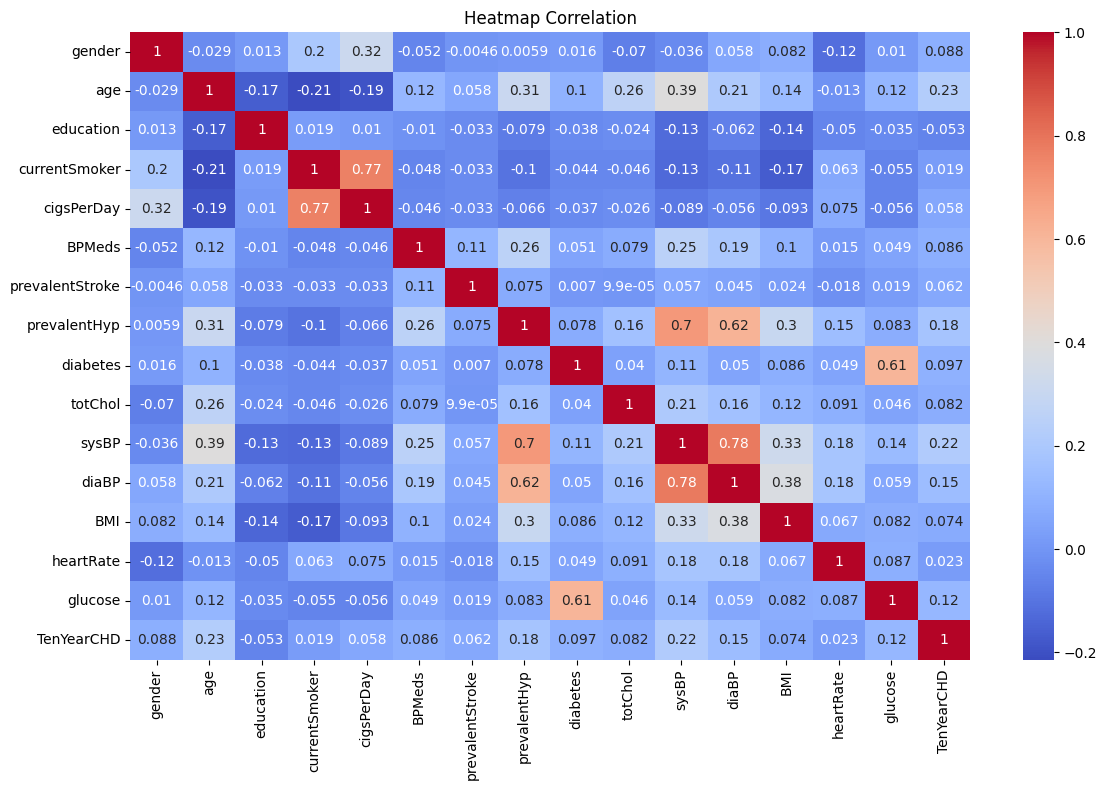

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation')
plt.tight_layout()
plt.show()

based on the results of the correlation heatmap, the correlation is high and relevant to the TenYearCHD column: Age, SysBP, PrevelantHyp, DiaBP, Glucose, Diabetes, TotChol, BMI, BPMeds, PrevalentStroke

## Data Preprocessing

In [ ]:
#fitur extraction
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [ ]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)

In [ ]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (3392, 15)
X_test shape : (848, 15)
y_train shape : (3392,)
y_test shape : (848,)


## Model Building

### Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred, target_names=['Non-CHD', 'CHD'])
print(report)

              precision    recall  f1-score   support

     Non-CHD       0.83      0.99      0.90       702
         CHD       0.38      0.03      0.06       146

    accuracy                           0.82       848
   macro avg       0.61      0.51      0.48       848
weighted avg       0.75      0.82      0.76       848



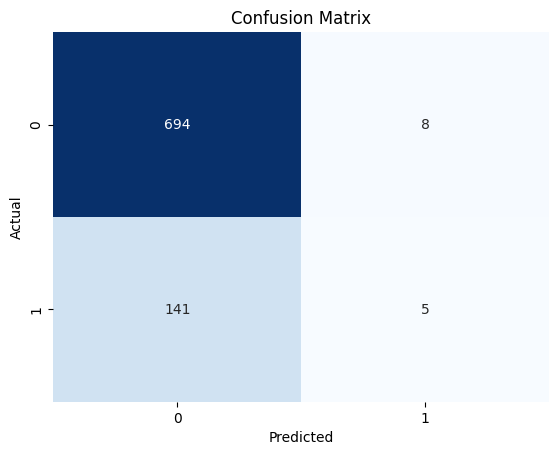

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

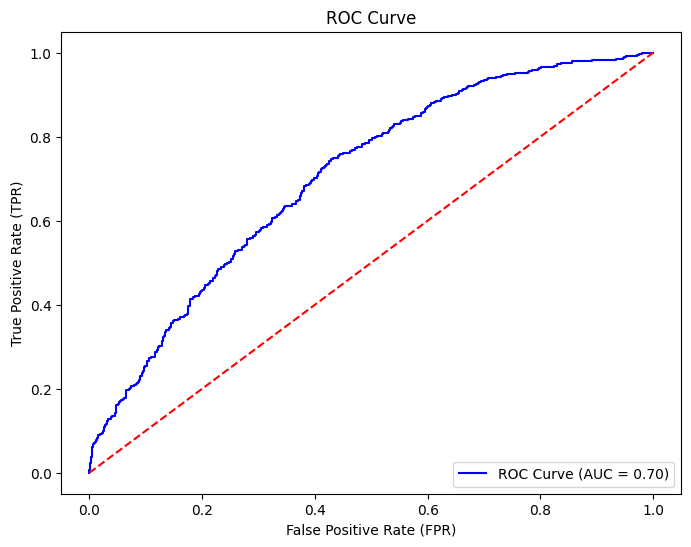

In [ ]:
#roc-auc score
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#plot roc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
rf_report = classification_report(y_test, y_pred, target_names=['Non-CHD', 'CHD'])
print(rf_report)

              precision    recall  f1-score   support

     Non-CHD       0.83      0.99      0.90       702
         CHD       0.40      0.03      0.05       146

    accuracy                           0.83       848
   macro avg       0.62      0.51      0.48       848
weighted avg       0.76      0.83      0.76       848



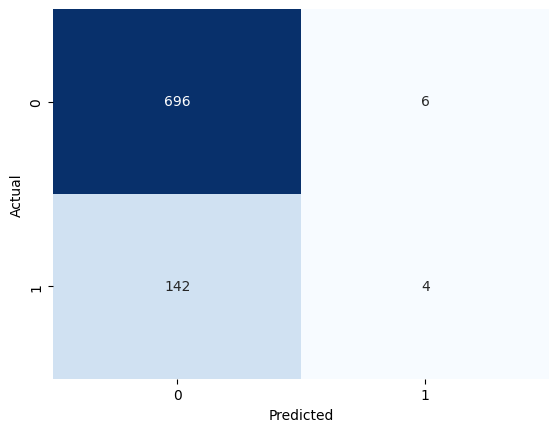

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

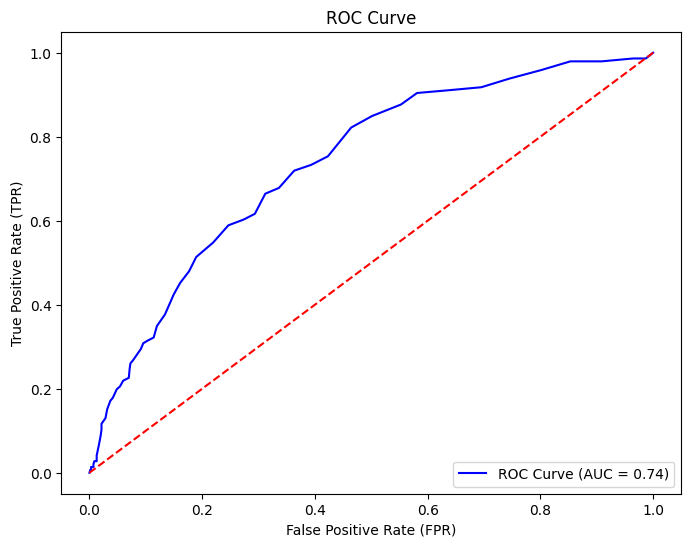

In [ ]:
#roc-auc score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#plot roc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Oversampling Method

In [ ]:
smote = SMOTE(random_state=21)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

,count
TenYearCHD,
0,3596
1,3596


In [ ]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=21, stratify=y_resampled)

### Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
#classification report
lr_report = classification_report(y_test, y_pred, target_names=['Non-CHD', 'CHD'])
print(lr_report)

              precision    recall  f1-score   support

     Non-CHD       0.66      0.64      0.65       719
         CHD       0.65      0.68      0.66       720

    accuracy                           0.66      1439
   macro avg       0.66      0.66      0.66      1439
weighted avg       0.66      0.66      0.66      1439



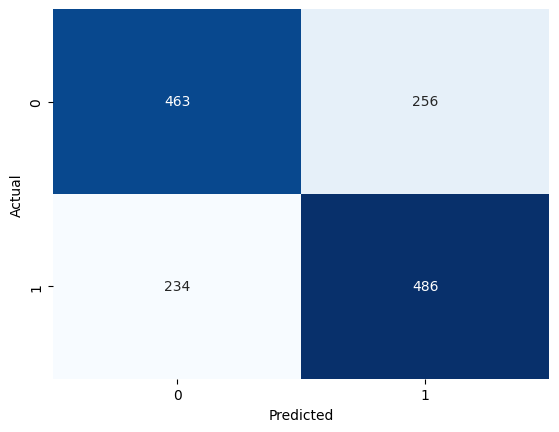

In [ ]:
#confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

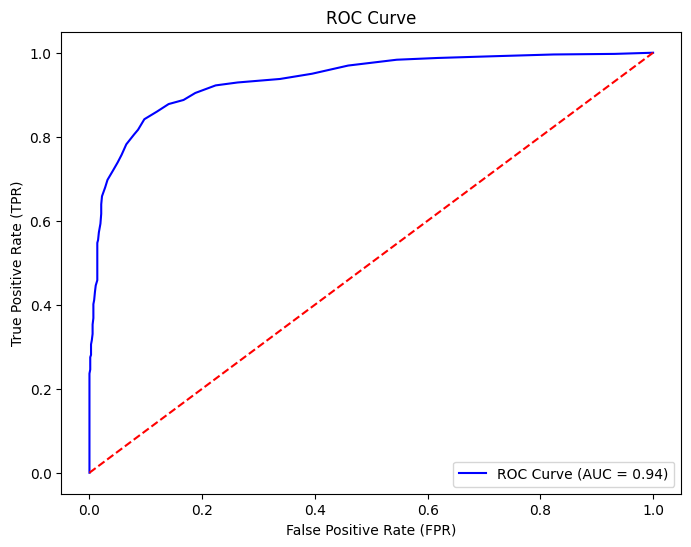

In [ ]:
#roc-auc score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#plot roc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
#predict
y_pred = rf_model.predict(X_test)

In [ ]:
rf_report = classification_report(y_test, y_pred, target_names=['Non-CHD', 'CHD'])
print(rf_report)

              precision    recall  f1-score   support

     Non-CHD       0.89      0.86      0.87       719
         CHD       0.86      0.89      0.88       720

    accuracy                           0.88      1439
   macro avg       0.88      0.88      0.88      1439
weighted avg       0.88      0.88      0.88      1439



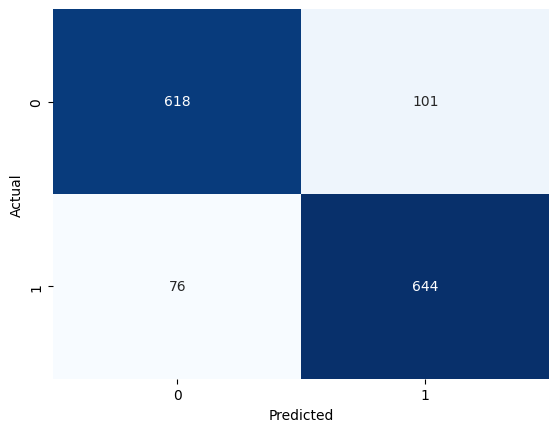

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

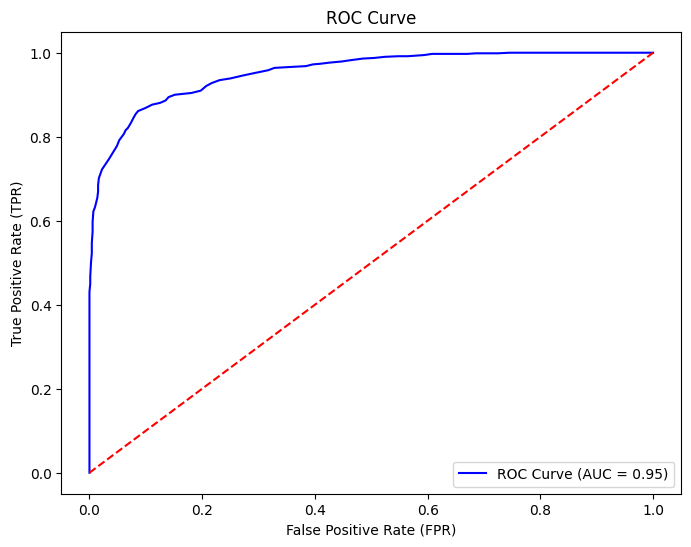

In [ ]:
#roc-auc score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#plot roc
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Predict

In [ ]:
#predict 10YearHDC with inputs
gender = 1
age = 61
education = 3
currentSmoker = 5
cigsPerDay = 30
BPMeds = 0
prevalentStroke = 0
prevalentHyp = 1
diabetes = 0
totChol = 225
sysBP = 150
diaBP = 95
BMI = 28.58
heartRate = 65
glucose = 120


input_data = np.array([gender, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose])

input_data_reshaped = input_data.reshape(1, -1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

[1]


In [ ]:
import pickle

pickle.dump(rf_model, open('rf_model.pkl', 'wb'))